##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# What does a neural network learn?

### Setting up

**Notebook setup**. Select the "Edit" menu, then "Notebook settings". Choose "GPU" as the hardware accelerator. Check that "Omit code cell output..." is unchecked (so that the output is saved).

**Upload dataset** Select the folder icon from the left sidebar menu. Click the upload button and select the file "lab6data.zip" from your computer.

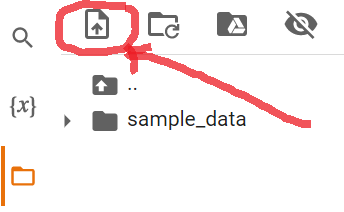

### Extract the dataset

In [2]:
!rm -rf lab6 __MACOSX

In [3]:
!unzip -o lab6.zip

Archive:  lab6.zip
   creating: lab6/
  inflating: __MACOSX/._lab6         
   creating: lab6/test/
  inflating: __MACOSX/lab6/._test    
   creating: lab6/train/
  inflating: __MACOSX/lab6/._train   
   creating: lab6/test/Cat/
  inflating: __MACOSX/lab6/test/._Cat  
   creating: lab6/test/Dog/
  inflating: __MACOSX/lab6/test/._Dog  
   creating: lab6/train/Cat/
  inflating: __MACOSX/lab6/train/._Cat  
   creating: lab6/train/Dog/
  inflating: __MACOSX/lab6/train/._Dog  
  inflating: lab6/test/Cat/12481.jpg  
  inflating: __MACOSX/lab6/test/Cat/._12481.jpg  
  inflating: lab6/test/Cat/11610.jpg  
  inflating: __MACOSX/lab6/test/Cat/._11610.jpg  
  inflating: lab6/test/Cat/11412.jpg  
  inflating: __MACOSX/lab6/test/Cat/._11412.jpg  
  inflating: lab6/test/Cat/9322.jpg  
  inflating: __MACOSX/lab6/test/Cat/._9322.jpg  
  inflating: lab6/test/Cat/10877.jpg  
  inflating: __MACOSX/lab6/test/Cat/._10877.jpg  
  inflating: lab6/test/Cat/9726.jpg  
  inflating: __MACOSX/lab6/test/Cat/._9726

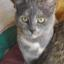

In [4]:
from PIL import Image
im = Image.open("lab6/train/Cat/161.jpg")
display(im)

### Import TensorFlow

In [5]:
import tensorflow as tf

from tensorflow.keras import layers, models


### Prepare the dataset for Keras

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory("lab6/train",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))

Found 1800 files belonging to 2 classes.


In [7]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory("lab6/test",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))

Found 200 files belonging to 2 classes.


### Experiment 1: train a model from scratch

Follow the instructions in moodle. You can start adding code in cells below and running them by pressing the forward arrow button in the corner. Add more cells as needed.

In [8]:
def make_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(2))
    return model

model = make_cnn_model()

In [9]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
history = model.fit(train_ds, epochs=15)

Epoch 1/15
57/57 [==============================] - 10s 12ms/step - loss: 5.4684 - accuracy: 0.5106
Epoch 2/15
57/57 [==============================] - 0s 8ms/step - loss: 0.6904 - accuracy: 0.5389
Epoch 3/15
57/57 [==============================] - 0s 7ms/step - loss: 0.6848 - accuracy: 0.5511
Epoch 4/15
57/57 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5094
Epoch 5/15
57/57 [==============================] - 1s 13ms/step - loss: 0.6920 - accuracy: 0.5022
Epoch 6/15
57/57 [==============================] - 1s 12ms/step - loss: 0.6913 - accuracy: 0.5039
Epoch 7/15
57/57 [==============================] - 0s 8ms/step - loss: 0.6939 - accuracy: 0.5167
Epoch 8/15
57/57 [==============================] - 0s 8ms/step - loss: 0.6929 - accuracy: 0.4828
Epoch 9/15
57/57 [==============================] - 0s 8ms/step - loss: 0.6917 - accuracy: 0.4850
Epoch 10/15
57/57 [==============================] - 0s 8ms/step - loss: 0.6907 - accuracy: 0.4822
Epoch 11/15
57

In [10]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print(test_acc)

7/7 - 0s - loss: 0.6920 - accuracy: 0.5100 - 217ms/epoch - 31ms/step
0.5099999904632568


Q1: What was the result (average accuracy of classifying cats and dogs in experiment 1)? Explain or comment the result.

The average accuracy was around ~0.5100 or ~51%. Such low result is a direct influence of multiple factors:

1. Low quality images.

I have only checked the 'cats' folder, therefore the following monologue will talk only about them. If we take a look at a provided train data, we can clearly see how horrible the image quality is. Photos include a wide range of brightful colours, sometimes cats even blend with the background. There is even a cat that did not fit into the photo!

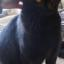

2. Small dataset

Another quite likely factor would be the size of the dataset the CNN was trained on. I will not discuss this in details because this factor is almost always followed by the next factor.

3. Overfitting

It is very likely our model, although it got very good at its own dataset, has *not really learned anything*. The thing is, due to the size of provided dataset in a combination with low-quality data let the model **memorize** it, **not learn from it**. Due to this, our CNN has successfully failed to recognize similar patterns during the test.

### Experiment 2: side channel data

In [11]:
!mkdir -p lab6/train2/Cat lab6/train2/Dog lab6/test2/Cat lab6/test2/Dog

In [12]:
import os
import os.path
from PIL import ImageDraw

def inject_text(ipath, opath, text):
    files = os.listdir(ipath)
    for fn in files:
        src = os.path.join(ipath, os.path.basename(fn))
        dest = os.path.join(opath, os.path.basename(fn))
        im = Image.open(src)
        canvas = ImageDraw.Draw(im)
        canvas.text((3,3), text, fill=(255, 0, 0))
        im.save(dest)

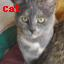

In [13]:
inject_text("lab6/train/Cat", "lab6/train2/Cat", "Cat")
inject_text("lab6/train/Dog", "lab6/train2/Dog", "Dog")
inject_text("lab6/test/Cat", "lab6/test2/Cat", "Cat")
inject_text("lab6/test/Dog", "lab6/test2/Dog", "Dog")
im = Image.open("lab6/train2/Cat/161.jpg")
display(im)

In [14]:
train_ds2 = tf.keras.preprocessing.image_dataset_from_directory("lab6/train2",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))
test_ds2 = tf.keras.preprocessing.image_dataset_from_directory("lab6/test2",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))

Found 1800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [15]:
model2 = make_cnn_model()
model2.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
history = model2.fit(train_ds2, epochs=5)

Epoch 1/5
57/57 [==============================] - 2s 8ms/step - loss: 4.2690 - accuracy: 0.6117
Epoch 2/5
57/57 [==============================] - 0s 8ms/step - loss: 0.0682 - accuracy: 0.9850
Epoch 3/5
57/57 [==============================] - 0s 8ms/step - loss: 6.7791e-04 - accuracy: 1.0000
Epoch 4/5
57/57 [==============================] - 1s 9ms/step - loss: 2.7825e-04 - accuracy: 1.0000
Epoch 5/5
57/57 [==============================] - 1s 12ms/step - loss: 1.8235e-04 - accuracy: 1.0000


In [16]:
test_loss, test_acc = model2.evaluate(test_ds2, verbose=2)
print(test_acc)

7/7 - 0s - loss: 9.5959e-04 - accuracy: 1.0000 - 301ms/epoch - 43ms/step
1.0


Q2: What was the result after injecting "hints" into images? Explain or comment the result.

**NB!** During this test I have run into weird issue when CNN model accuracy would drop back to 50% and after a rerun recover back to 100%. I guess it could be related to the fact that the model *studies differently each time*?

The accuracy has drastically improved from ~53-58% to a **whopping 99-100%**. Nevertheless, it is quite early to celebrate, because we still have to test different use cases and databases. In the next block of code I will test whether this model behaves the same way with a no-hint dataset.

In [17]:
model2 = make_cnn_model()
model2.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
history = model2.fit(train_ds, epochs=5)

test_loss, test_acc = model2.evaluate(test_ds, verbose=2)
print(test_acc)

Epoch 1/5
57/57 [==============================] - 3s 13ms/step - loss: 5.7244 - accuracy: 0.5017
Epoch 2/5
57/57 [==============================] - 1s 8ms/step - loss: 0.6787 - accuracy: 0.5728
Epoch 3/5
57/57 [==============================] - 1s 10ms/step - loss: 0.6732 - accuracy: 0.5861
Epoch 4/5
57/57 [==============================] - 1s 9ms/step - loss: 0.6351 - accuracy: 0.6244
Epoch 5/5
57/57 [==============================] - 1s 8ms/step - loss: 0.5966 - accuracy: 0.6667
7/7 - 0s - loss: 0.7391 - accuracy: 0.5400 - 173ms/epoch - 25ms/step
0.5400000214576721


We could conclude the following: our model has learned to **recognize the text** written on the image rather than the object. Although it might have made analogies (as our accuracy in the previous test was not zero), it is still quite random.

### Experiment 3: adversarial data

In [18]:
!mkdir -p lab6/test3/Cat lab6/test3/Dog

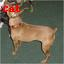

In [19]:
inject_text("lab6/test/Cat", "lab6/test3/Cat", "Dog")
inject_text("lab6/test/Dog", "lab6/test3/Dog", "Cat")
im = Image.open("lab6/test3/Dog/10010.jpg")
display(im)

I will recreate the model once again so it is *crystal-clear* after the previous experiment

In [20]:
model2 = make_cnn_model()
model2.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
history = model2.fit(train_ds2, epochs=5)

Epoch 1/5
57/57 [==============================] - 2s 8ms/step - loss: 4.3927 - accuracy: 0.7528
Epoch 2/5
57/57 [==============================] - 0s 8ms/step - loss: 0.0161 - accuracy: 0.9972
Epoch 3/5
57/57 [==============================] - 0s 8ms/step - loss: 6.7845e-04 - accuracy: 1.0000
Epoch 4/5
57/57 [==============================] - 1s 8ms/step - loss: 2.3757e-04 - accuracy: 1.0000
Epoch 5/5
57/57 [==============================] - 0s 7ms/step - loss: 1.3880e-04 - accuracy: 1.0000


In [21]:
test_ds3 = tf.keras.preprocessing.image_dataset_from_directory("lab6/test3",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64))

Found 200 files belonging to 2 classes.


In [22]:
test_loss, test_acc = model2.evaluate(test_ds3, verbose=2)
print(test_acc)

7/7 - 0s - loss: 10.5246 - accuracy: 0.0050 - 183ms/epoch - 26ms/step
0.004999999888241291


Q3: What was the result after reversing the captions on test images?

The result was *almost* zero accuracy. This is reinforced by the previously mentioned issue: the model **has learned to read the text** and make conclusions based on it, rather than learn distinguisable elements of each animal.

### Experiment 4: transfer learning

In [23]:
base_model = tf.keras.applications.ResNet50(include_top=False)
base_model.trainable = False

def make_pretrained_model(base_model):
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(2)(x)
    model = tf.keras.Model(inputs, outputs)
    return model

model4 = make_pretrained_model(base_model)

94765736/94765736 [==============================] - 0s 0us/step


In [24]:
train_ds4 = tf.keras.preprocessing.image_dataset_from_directory("lab6/train2",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224))

model4.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
model4.fit(train_ds4, epochs=15)

Found 1800 files belonging to 2 classes.
Epoch 1/15
57/57 [==============================] - 10s 100ms/step - loss: 0.4305 - accuracy: 0.8011
Epoch 2/15
57/57 [==============================] - 6s 96ms/step - loss: 0.2078 - accuracy: 0.9089
Epoch 3/15
57/57 [==============================] - 6s 93ms/step - loss: 0.1709 - accuracy: 0.9300
Epoch 4/15
57/57 [==============================] - 6s 96ms/step - loss: 0.1403 - accuracy: 0.9483
Epoch 5/15
57/57 [==============================] - 6s 95ms/step - loss: 0.1242 - accuracy: 0.9533
Epoch 6/15
57/57 [==============================] - 6s 94ms/step - loss: 0.1159 - accuracy: 0.9628
Epoch 7/15
57/57 [==============================] - 6s 98ms/step - loss: 0.0980 - accuracy: 0.9728
Epoch 8/15
57/57 [==============================] - 6s 95ms/step - loss: 0.0867 - accuracy: 0.9789
Epoch 9/15
57/57 [==============================] - 6s 99ms/step - loss: 0.0808 - accuracy: 0.9778
Epoch 10/15
57/57 [==============================] - 6s 97ms/step 

In [25]:
test_ds4 = tf.keras.preprocessing.image_dataset_from_directory("lab6/test3",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224))

test_loss, test_acc = model4.evaluate(test_ds4, verbose=2)
print(test_acc)

Found 200 files belonging to 2 classes.
7/7 - 2s - loss: 0.2225 - accuracy: 0.9150 - 2s/epoch - 241ms/step
0.9150000214576721


Q4: The ResNet50 model was trained with "Cat" and "Dog" captions placed correctly and tested with the captions reversed like in experiment 3. What happened? Explain or comment the result.

First of all, I would like to notice that during this experiment the GPU RAM usage has **drastically** spiked. It went from nearly 1GB to 8-9GB of RAM usage, which is *insane*.

Considering ResNet50 had previously been trained for image-detection, it has most likely learned the features of cats and dogs. At the same time, we have *enhanced* its knowledge base with our dataset. The thing is, if we account for an increase in GPU RAM usage, as well as much slower "epoch" running time, we could surely conclude that ResNet50 has **truly learned** features of both animals. This leads to a decrease in loss: although it has not become null, it is noticeably lower than the one of our CNN model.

Moreover, even though the text was reversed during the test, the ResNet50 model would lean towards comparing the features of the image based on its previously acquired knowledge, rather than the text only.